# Data Visualization

## Final Project


John Ware <br>
21 August 2022



<hr style="border-top: 3px solid black; margin-top: 10px; margin-bottom: 10px"></hr>

## Overview

This is the Jupyter Notebook with analysis for the Data Visualization final project. Comments are embedded throughout. Please see the Ware_final_paper.pdf file for the detailed report. 

Main Dataset: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?select=st




In [1]:
# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #; sns.set(style="ticks", color_codes=True) 


## Importing Data

In [2]:
# Locate and load the data file
df = pd.read_csv('states_all.csv')
df_orig = df.copy() #Store original dataframe before modifications

# Sanity check & Visualize Data
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=1715, M columns=25


PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0  ...     57948.0     58025.0      41167.0           NaN            NaN   
1  ...      9748.0      8789.0       6714.0           NaN            NaN   
2  ...     55433.0     49081.0      37410.0           NaN            NaN   
3  ...     34632.0     36011.0      27651.0           NaN            NaN   
4  ...    418418.0    363296.0     270675.0           NaN            NaN   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0      731634.0             208.0             252.0                207.0   
1      122487.0               NaN               NaN                  NaN   
2      673477.0             215.0             265.0                209.0   
3      441490.0             210.0             256.0                211.0   
4     5254844.0             208.0             261.0                202.0   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 25 columns]

In [3]:
df.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1715.000000  1.224000e+03   1.275000e+03     1.275000e+03   
mean   2002.075219  9.175416e+05   9.102045e+06     7.677799e+05   
std       9.568621  1.066514e+06   1.175962e+07     1.146992e+06   
min    1986.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1994.000000  2.645145e+05   2.189504e+06     1.899575e+05   
50%    2002.000000  6.499335e+05   5.085826e+06     4.035480e+05   
75%    2010.000000  1.010532e+06   1.084516e+07     8.279320e+05   
max    2019.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.275000e+03   1.275000e+03       1.275000e+03   
mean    4.223743e+06   4.110522e+06       9.206242e+06   
std     5.549735e+06   5.489562e+06       1.199279e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.165776e+06   7.151210e+05       2.170404e+06   
50%     2.537754e+06   2.058996e+06       5.242672e+06   
75%     5.055548e+06   4.755293e+06       1.074420e+07   
max     5.090457e+07   3.610526e+07       8.532013e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.275000e+03                  1.275000e+03   
mean              4.768010e+06                  2.682587e+06   
std               6.300569e+06                  3.357214e+06   
min               2.655490e+05                  1.399630e+05   
25%               1.171336e+06                  6.380760e+05   
50%               2.658253e+06                  1.525471e+06   
75%               5.561959e+06                  3.222924e+06   
max               4.396452e+07                  2.605802e+07   

       OTHER_EXPENDITURE  ...     GRADES_4_G     GRADES_8_G    GRADES_12_G  \
count       1.224000e+03  ...    1632.000000    1632.000000    1632.000000   
mean        4.299509e+05  ...   69166.507966   68106.537377   58420.870711   
std         5.347893e+05  ...   79957.990356   77965.847263   67438.530709   
min         1.154100e+04  ...    4577.000000    3371.000000    2572.000000   
25%         1.034492e+05  ...   18971.500000   19594.250000   16076.500000   
50%         2.717040e+05  ...   49087.000000   47880.000000   39408.000000   
75%         5.172222e+05  ...   78504.250000   78976.000000   69397.250000   
max         3.995951e+06  ...  493415.000000  500143.000000  498403.000000   

       GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
count  1.020000e+03   1.071000e+03  1.632000e+03        565.000000   
mean   5.779547e+05   2.820691e+05  9.139695e+05        236.327434   
std    6.757837e+05   3.307098e+05  1.055893e+06          9.285505   
min    3.769800e+04   1.353000e+04  6.844900e+04        192.000000   
25%    1.649250e+05   8.060800e+04  2.480832e+05        232.000000   
50%    4.051115e+05   1.869190e+05  6.458050e+05        238.000000   
75%    6.439752e+05   3.223280e+05  1.043420e+06        242.000000   
max    3.929869e+06   2.013687e+06  6.441557e+06        253.000000   

       AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  
count        602.000000           650.000000           562.000000  
mean         278.280731           218.806154           263.558719  
std           10.343482             7.681805             6.612601  
min          231.000000           179.000000           236.000000  
25%          272.000000           215.000000           260.000000  
50%          280.500000           220.000000           265.000000  
75%          286.000000           224.000000           268.000000  
max          301.000000           237.000000           280.000000  

[8 rows x 23 columns]

In [4]:
#how many NaN values? 
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

This particular dataset has several NaN values due to the data only being collected or reported in a subset of the years. 

## Adding Datafields

In [5]:
# Add in calculated fields
#df['rev/8th_grader'] = df['TOTAL_REVENUE'] / df['GRADES_8_G'] # Revenue per 8th grade student
#df['spend/8th_grader'] = df['TOTAL_EXPENDITURE'] / df['GRADES_8_G'] #Expenditures per 8th grade student
df['Spend_per_Student'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G'] #Total spending per student
df.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  \
0  ...     58025.0      41167.0           NaN            NaN      731634.0   
1  ...      8789.0       6714.0           NaN            NaN      122487.0   
2  ...     49081.0      37410.0           NaN            NaN      673477.0   
3  ...     36011.0      27651.0           NaN            NaN      441490.0   
4  ...    363296.0     270675.0           NaN            NaN     5254844.0   

   AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0             208.0             252.0                207.0   
1               NaN               NaN                  NaN   
2             215.0             265.0                209.0   
3             210.0             256.0                211.0   
4             208.0             261.0                202.0   

   AVG_READING_8_SCORE  Spend_per_Student  
0                  NaN           3.627221  
1                  NaN           7.939520  
2                  NaN           5.050774  
3                  NaN           3.948044  
4                  NaN           5.164536  

[5 rows x 26 columns]

In [6]:
# Calc average grades, ignoring NaN values
temp = df[['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']].copy()
df['Average_Grades'] = temp.mean(axis=1, skipna=True)
df.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  \
0  ...      41167.0           NaN            NaN      731634.0   
1  ...       6714.0           NaN            NaN      122487.0   
2  ...      37410.0           NaN            NaN      673477.0   
3  ...      27651.0           NaN            NaN      441490.0   
4  ...     270675.0           NaN            NaN     5254844.0   

   AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0             208.0             252.0                207.0   
1               NaN               NaN                  NaN   
2             215.0             265.0                209.0   
3             210.0             256.0                211.0   
4             208.0             261.0                202.0   

   AVG_READING_8_SCORE  Spend_per_Student  Average_Grades  
0                  NaN           3.627221      222.333333  
1                  NaN           7.939520             NaN  
2                  NaN           5.050774      229.666667  
3                  NaN           3.948044      225.666667  
4                  NaN           5.164536      223.666667  

[5 rows x 27 columns]

### State Pre-Processing

In [7]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# Canonical URL: https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.  Data originally from Wikipedia at the url:
# https://en.wikipedia.org/wiki/ISO_3166-2:US
#
# Automatically Generated 2021-09-11 18:04:36 via Jupyter Notebook from
# https://gist.github.com/rogerallen/d75440e8e5ea4762374dfd5c1ddf84e0 

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
#    "New Jersey": "NJ",
    "New_jersey": "NJ", #underscore
#    "New Mexico": "NM",
    "New_mexico": "NM", #underscore
#    "New York": "NY",
    "New_york": "NY", #underscore
#    "North Carolina": "NC",
    "North_carolina": "NC", #underscore
#    "North Dakota": "ND",
    "North_dakota": "ND", #underscore
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
#    "Rhode Island": "RI",
    "Rhode_island": "RI", #underscore
#    "South Carolina": "SC",
    "South_carolina": "SC", #underscore
#    "South Dakota": "SD",
    "South_dakota": "SD", #underscore
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
#    "West Virginia": "WV",
    "West_virginia": "WV", #underscore
    "Wisconsin": "WI",
    "Wyoming": "WY",
#    "District of Columbia": "DC",
    "District_of_columbia": "DC", #underscore
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [8]:
# Create new datafield for state abbreviations, using dictionary defined above
df['abbrev'] = df['STATE'].str.capitalize().replace(us_state_to_abbrev)
df.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
0  ...           NaN            NaN      731634.0             208.0   
1  ...           NaN            NaN      122487.0               NaN   
2  ...           NaN            NaN      673477.0             215.0   
3  ...           NaN            NaN      441490.0             210.0   
4  ...           NaN            NaN     5254844.0             208.0   

   AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  \
0             252.0                207.0                  NaN   
1               NaN                  NaN                  NaN   
2             265.0                209.0                  NaN   
3             256.0                211.0                  NaN   
4             261.0                202.0                  NaN   

   Spend_per_Student  Average_Grades  abbrev  
0           3.627221      222.333333      AL  
1           7.939520             NaN      AK  
2           5.050774      229.666667      AZ  
3           3.948044      225.666667      AR  
4           5.164536      223.666667      CA  

[5 rows x 28 columns]

## Correlation Matrix

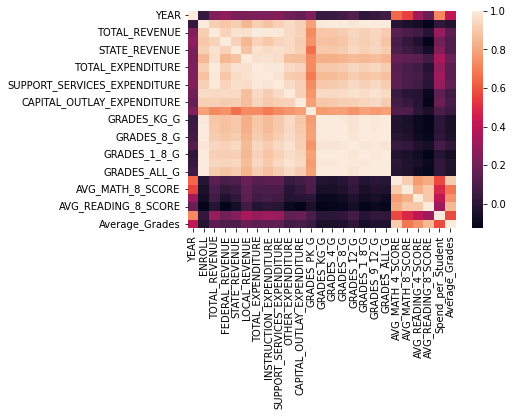

In [9]:
sns.heatmap(df.corr());

In [10]:
# Focus on correlations to Average Grades
corr = df.corr().abs() #create correlation matrix, absolute value
corr_grades = corr['Average_Grades'].sort_values(ascending=False) #what are the highest correlations?
corr_grades[0:15] #show the first 15

Average_Grades                  1.000000
AVG_MATH_4_SCORE                0.911361
AVG_READING_8_SCORE             0.851034
AVG_READING_4_SCORE             0.747786
AVG_MATH_8_SCORE                0.680051
Spend_per_Student               0.570704
YEAR                            0.408602
LOCAL_REVENUE                   0.176505
SUPPORT_SERVICES_EXPENDITURE    0.147366
INSTRUCTION_EXPENDITURE         0.141936
TOTAL_REVENUE                   0.141314
TOTAL_EXPENDITURE               0.138102
FEDERAL_REVENUE                 0.104547
STATE_REVENUE                   0.103807
CAPITAL_OUTLAY_EXPENDITURE      0.083696
Name: Average_Grades, dtype: float64

*Highlight correlation with spending per student*

## Focused Data Frame

In [11]:
df_pair = df[['STATE', 'YEAR', 'TOTAL_REVENUE',
       'TOTAL_EXPENDITURE', 'GRADES_ALL_G', 'Spend_per_Student', 
          'Average_Grades']].copy()
df_pair.head()

STATE  YEAR  TOTAL_REVENUE  TOTAL_EXPENDITURE  GRADES_ALL_G  \
0     ALABAMA  1992      2678885.0          2653798.0      731634.0   
1      ALASKA  1992      1049591.0           972488.0      122487.0   
2     ARIZONA  1992      3258079.0          3401580.0      673477.0   
3    ARKANSAS  1992      1711959.0          1743022.0      441490.0   
4  CALIFORNIA  1992     26260025.0         27138832.0     5254844.0   

   Spend_per_Student  Average_Grades  
0           3.627221      222.333333  
1           7.939520             NaN  
2           5.050774      229.666667  
3           3.948044      225.666667  
4           5.164536      223.666667

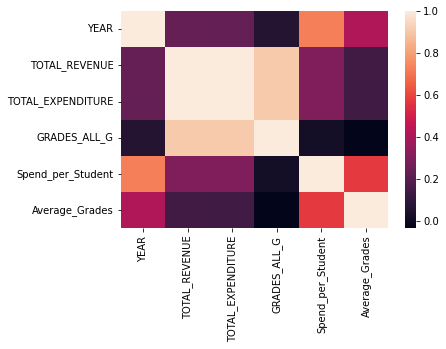

In [12]:
sns.heatmap(df_pair.corr());

## Pairplot

In [13]:
df_pair.describe()

YEAR  TOTAL_REVENUE  TOTAL_EXPENDITURE  GRADES_ALL_G  \
count  1715.000000   1.275000e+03       1.275000e+03  1.632000e+03   
mean   2002.075219   9.102045e+06       9.206242e+06  9.139695e+05   
std       9.568621   1.175962e+07       1.199279e+07  1.055893e+06   
min    1986.000000   4.656500e+05       4.816650e+05  6.844900e+04   
25%    1994.000000   2.189504e+06       2.170404e+06  2.480832e+05   
50%    2002.000000   5.085826e+06       5.242672e+06  6.458050e+05   
75%    2010.000000   1.084516e+07       1.074420e+07  1.043420e+06   
max    2019.000000   8.921726e+07       8.532013e+07  6.441557e+06   

       Spend_per_Student  Average_Grades  
count        1275.000000      732.000000  
mean            9.725949      246.690688  
std             3.748900       12.883247  
min             2.306811      179.000000  
25%             6.859619      241.500000  
50%             9.182504      249.750000  
75%            11.650409      254.750000  
max            25.013784      281.000000

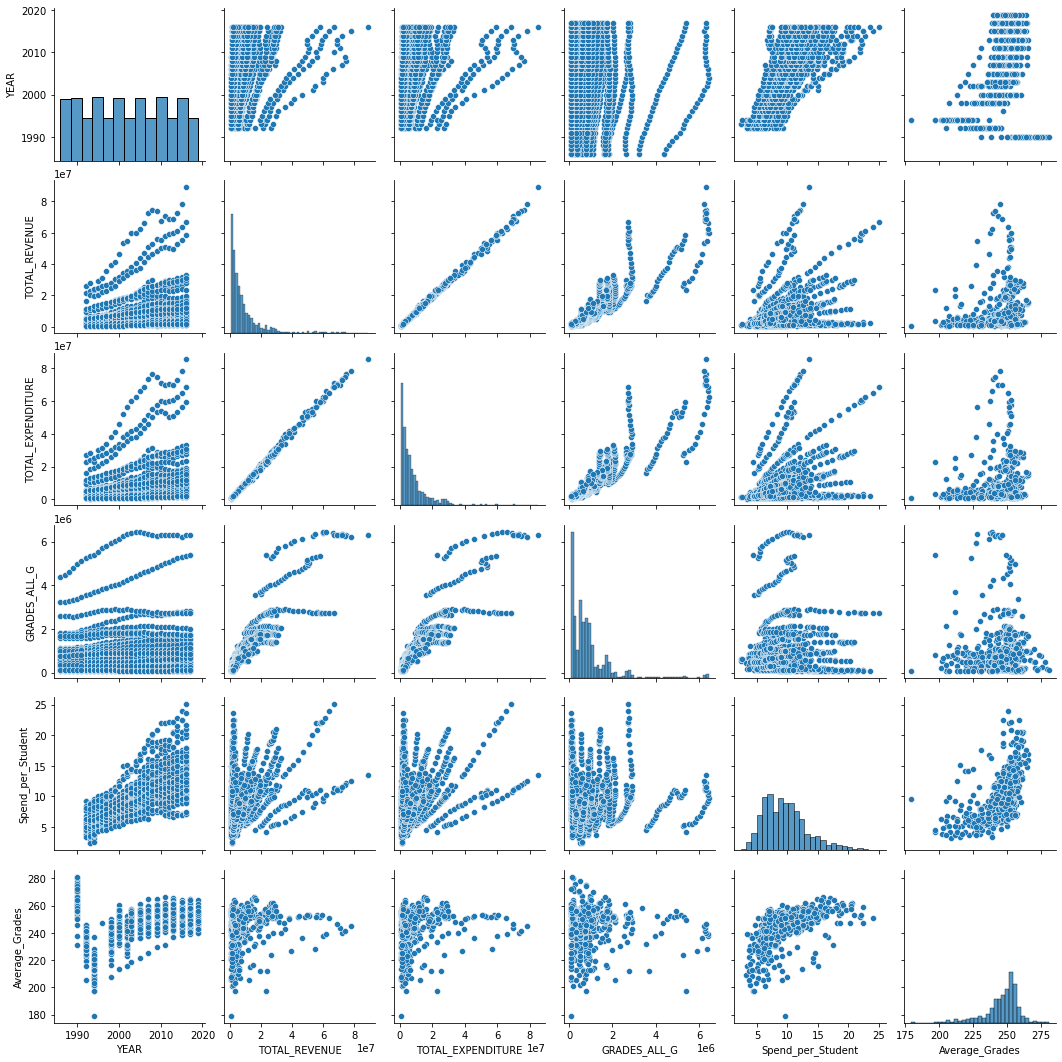

In [14]:
sns.pairplot(df_pair)

## Spending Over Time

In [15]:
# filter to 4 states
state_list = ['FLORIDA','COLORADO','TEXAS','WASHINGTON']

df2 = df[df['STATE'].isin(state_list)]
print(f'N rows={len(df2)}, M columns={len(df2.columns)}')
df2.head()

N rows=132, M columns=28


PRIMARY_KEY       STATE  YEAR    ENROLL  TOTAL_REVENUE  \
5     1992_COLORADO    COLORADO  1992       NaN      3185173.0   
9      1992_FLORIDA     FLORIDA  1992       NaN     11506299.0   
43       1992_TEXAS       TEXAS  1992       NaN     16264180.0   
47  1992_WASHINGTON  WASHINGTON  1992       NaN      4870832.0   
56    1993_COLORADO    COLORADO  1993  539538.0      3058326.0   

    FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
5          163253.0      1307986.0      1713934.0          3264826.0   
9          788420.0      5683949.0      5033930.0         11305642.0   
43        1160185.0      6706959.0      8397036.0         16119084.0   
47         263053.0      3467779.0      1140000.0          5360834.0   
56         147793.0      1242337.0      1668196.0          3028305.0   

    INSTRUCTION_EXPENDITURE  ...  GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  \
5                 1642466.0  ...           NaN            NaN      612635.0   
9                 5166374.0  ...           NaN            NaN     1981407.0   
43                7961379.0  ...           NaN            NaN     3541769.0   
47                2587181.0  ...           NaN            NaN      896475.0   
56                1537714.0  ...           NaN            NaN      625062.0   

    AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
5              221.0             272.0                217.0   
9              214.0             260.0                208.0   
43             218.0             265.0                213.0   
47               NaN               NaN                  NaN   
56               NaN               NaN                  NaN   

    AVG_READING_8_SCORE  Spend_per_Student  Average_Grades  abbrev  
5                   NaN           5.329154      236.666667      CO  
9                   NaN           5.705866      227.333333      FL  
43                  NaN           4.551139      232.000000      TX  
47                  NaN           5.979904             NaN      WA  
56                  NaN           4.844807             NaN      CO  

[5 rows x 28 columns]

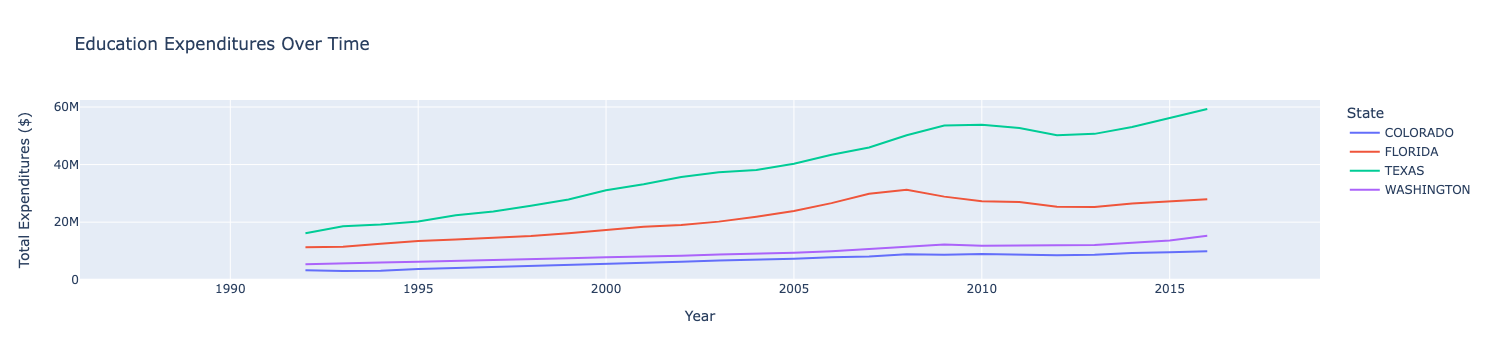

In [16]:
import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df2, x="YEAR", y="TOTAL_EXPENDITURE", color='STATE', title='Education Expenditures Over Time',
             labels={'YEAR':'Year', 'TOTAL_EXPENDITURE':'Total Expenditures ($)', 'STATE':'State'})
fig.show()

These 4 target states show a range of patterns over the years. Some states (like Texas) have increased education funding steadily over the years, whereas others like Colorado have hardly increased enough to combat inflation. 

## Spending per Student

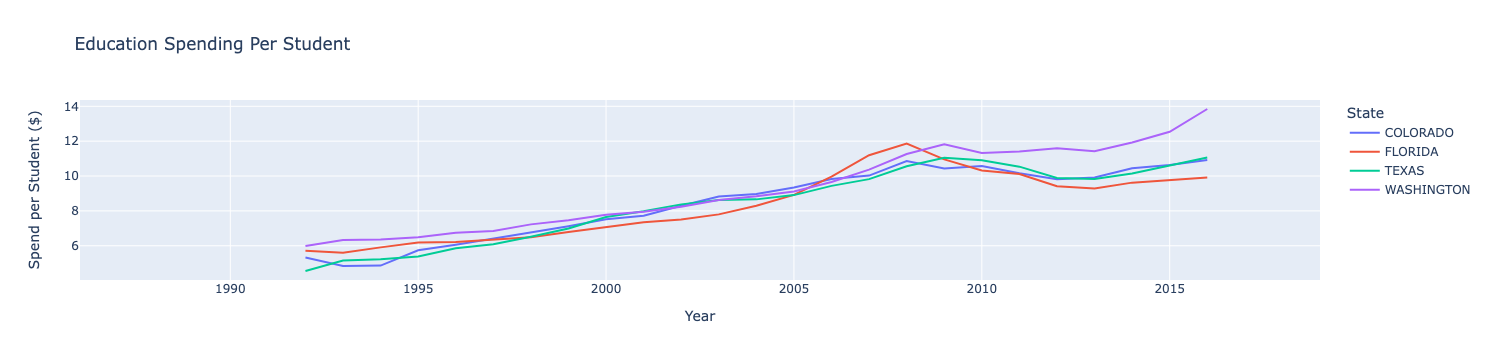

In [17]:
# Plot - subset of states to compare to above
import plotly.express as px

fig = px.line(df2, x="YEAR", y="Spend_per_Student", color='STATE', title='Education Spending Per Student',
             labels={'YEAR':'Year', 'Spend_per_Student':'Spend per Student ($)', 'STATE':'State'})
fig.show()

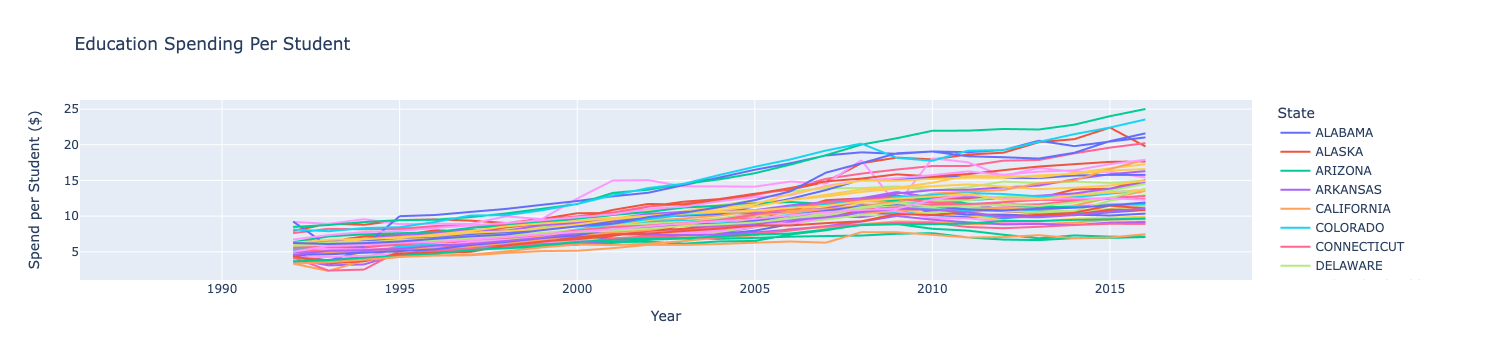

In [18]:
# Plot - All States
import plotly.express as px

fig = px.line(df, x="YEAR", y="Spend_per_Student", color='STATE', title='Education Spending Per Student',
             labels={'YEAR':'Year', 'Spend_per_Student':'Spend per Student ($)', 'STATE':'State'})
fig.show()

The trend shows education spending per student has steadily increased in every state, with some accelerating faster than others. 

## Average Grades

In [19]:
#df['Instr/8th grader'] = df['INSTRUCTION_EXPENDITURE'] / df['GRADES_8_G']

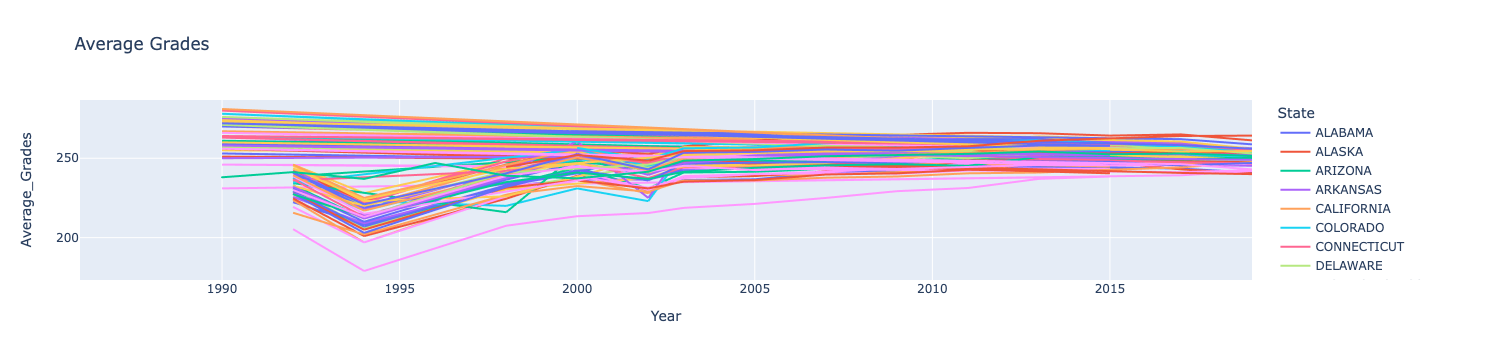

In [20]:
# Plot
import plotly.express as px

fig = px.line(df, x="YEAR", y="Average_Grades", color='STATE', title='Average Grades',
             labels={'YEAR':'Year', 'Spend_per_Student':'Spend per Student ($)', 'STATE':'State'})
fig.update_traces(connectgaps=True)

fig.show()

*Not a ton of data*

In [21]:
print('Total: ', len(df['Average_Grades']))
print('NaN: ',df['Average_Grades'].isna().sum())

Total:  1715
NaN:  983


## Choropleth

### Aggregate Data

In [22]:
# Create new data field, state_avg, for 'Spend_per_Student' mean organized by state
df['state_avg'] = df.groupby('abbrev').Spend_per_Student.transform('mean')

### US Heat Map

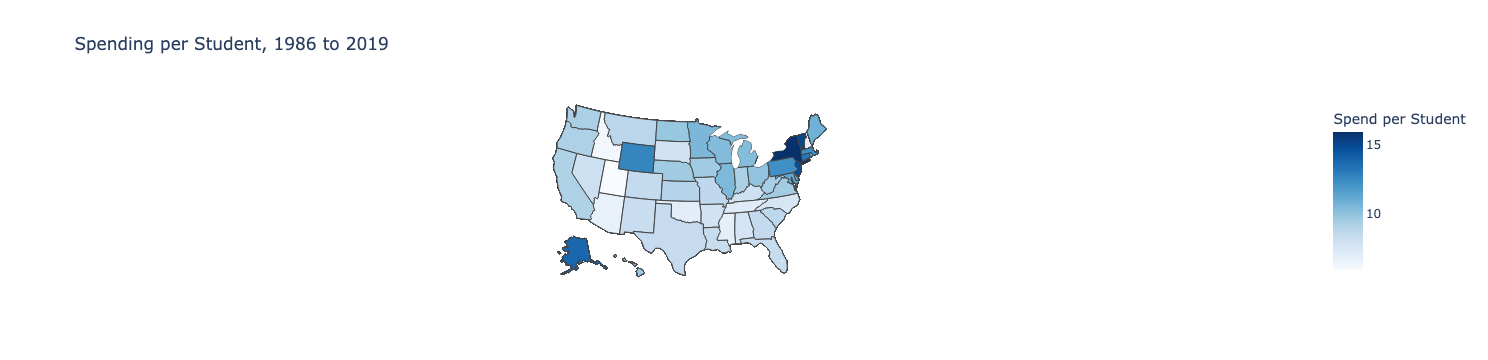

In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['abbrev'], # Spatial coordinates
    z = df['state_avg'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Spend per Student",
))

fig.update_layout(
    title_text = 'Spending per Student, 1986 to 2019',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## Spending vs. Grades

In [24]:
# Narrow to single state - highest spending per student
#state_list = ['NY', 'NM']
#df = df_temp
state_list = ['NY']
df2 = df[df['abbrev'].isin(state_list)]
print(df2.shape)
df2.head()


(33, 29)


PRIMARY_KEY     STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
32   1992_NEW_YORK  NEW_YORK  1992        NaN     21630179.0        1172030.0   
83   1993_NEW_YORK  NEW_YORK  1993  2663637.0     22688753.0        1276362.0   
134  1994_NEW_YORK  NEW_YORK  1994  2702937.0     23933662.0        1442038.0   
185  1995_NEW_YORK  NEW_YORK  1995  2738361.0     25063999.0        1368074.0   
236  1996_NEW_YORK  NEW_YORK  1996  2788343.0     26026366.0        1510447.0   

     STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
32       8697663.0     11760486.0         22815611.0               13288972.0   
83       8848470.0     12563921.0         23934282.0               14029639.0   
134      9092275.0     13399349.0         25359726.0               14829280.0   
185      9932669.0     13763256.0         26540967.0               15693535.0   
236     10284155.0     14231764.0         26974514.0               15973623.0   

     ...  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  \
32   ...            NaN     2689686.0             218.0             266.0   
83   ...            NaN     2733813.0               NaN               NaN   
134  ...            NaN     2766208.0               NaN               NaN   
185  ...            NaN     2813230.0               NaN               NaN   
236  ...            NaN     2843131.0               NaN               NaN   

     AVG_READING_4_SCORE  AVG_READING_8_SCORE  Spend_per_Student  \
32                 215.0                  NaN           8.482630   
83                   NaN                  NaN           8.754908   
134                212.0                  NaN           9.167686   
185                  NaN                  NaN           9.434340   
236                  NaN                  NaN           9.487609   

     Average_Grades  abbrev  state_avg  
32            233.0      NY    15.9095  
83              NaN      NY    15.9095  
134           212.0      NY    15.9095  
185             NaN      NY    15.9095  
236             NaN      NY    15.9095  

[5 rows x 29 columns]

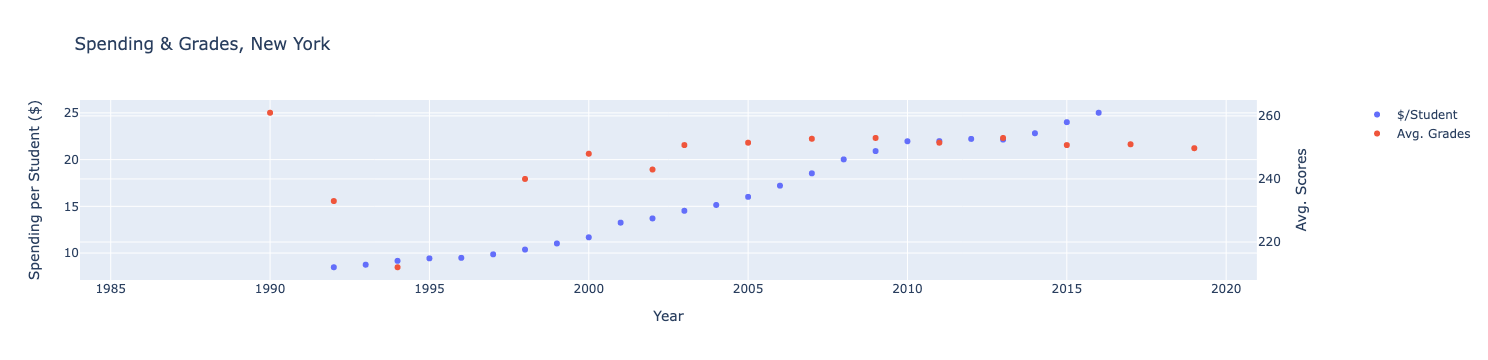

In [25]:
# Dual axis line chart; from https://plotly.com/python/multiple-axes/
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_temp = df.copy()
df = df2.copy()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df['YEAR'], y=df['Spend_per_Student'], name="$/Student"),
    secondary_y=False, 
)

fig.add_trace(
    go.Scatter(x=df['YEAR'], y=df['Average_Grades'], name="Avg. Grades"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Spending & Grades, New York"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Spending per Student ($)", secondary_y=False)
fig.update_yaxes(title_text="Avg. Scores", secondary_y=True)

fig.update_traces(connectgaps=False, mode='markers')


fig.show()

#reset
df = df_temp